# Model Calibration

In [1]:
import household_contact_tracing_dropbox as model
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as ss

The model calibration class inherits from the base model class, so you are using the exact same code/distributions. The calibration estimates the $R_0$ of the model using the Lorenzo's household R_0 paper. The local and global infections are simulated, hence there is uncertainty in the output.

In order to tune the models, we estimate the R_0 over a variety of inputs, and fits a quick linear regression to the outputs.

Note: The calculation can produce some crazy values if the inputs aren't realistic, this is a minor issue for now.

In [2]:
model_calibration = model.model_calibration(haz_rate_scale = 0.795,
                                            contact_tracing_success_prob = 2/3,
                                            prob_of_successful_contact_trace_today = 1/3,
                                            overdispersion = 0.36,
                                            infection_reporting_prob = 0.2,
                                            reporting_delay_par = 1/4.8,
                                            contact_trace = False,
                                            reduce_contacts_by = 0)
model_calibration.calculate_R0()

3.3711755451911665

In [3]:
x_vals = np.linspace(0.79, 0.81, 5)
repetitions = 10
hazard_rate_scale = []
R0_estimate = []
for x in x_vals:
    model_calibration = model.model_calibration(haz_rate_scale = x,
                                                contact_tracing_success_prob = 2/3,
                                                prob_of_successful_contact_trace_today = 1/3,
                                                overdispersion = 0.36,
                                                infection_reporting_prob = 0.7,
                                                reporting_delay_par = 1/4.8,
                                                contact_trace = True,
                                                reduce_contacts_by = 0)
    for repeat in range(repetitions):
        print(f"x values : {x}   repeat: {repeat}", end = "\r")
        hazard_rate_scale.append(x)
        R0_estimate.append(model_calibration.calculate_R0())

In [4]:
data = pd.DataFrame({"hazard_rate_scale": hazard_rate_scale,
                     "R0_estimate": R0_estimate})

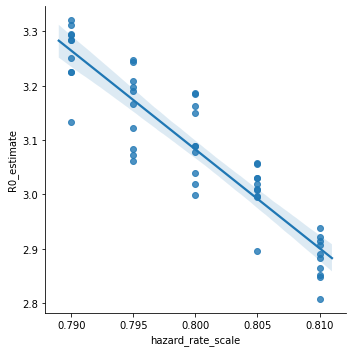

In [5]:
plot = sns.lmplot("hazard_rate_scale", "R0_estimate", data)

In [6]:
linear_model = ss.linregress(plot.data)

In [7]:
(3 - linear_model.intercept)/linear_model.slope

-44.64420745472625

In [8]:
linear_model.intercept + 0.8*linear_model.slope

0.9052298221398231